In [3]:
import pandas as pd

In [4]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset= dataset.replace({True: 1, False: 0})

In [6]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [7]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [8]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [9]:
dependent=dataset[["charges"]]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
x_train,x_test,y_train,y_test

(      age     bmi  children  sex_male  smoker_yes
 1163   18  28.215         0         0           0
 196    39  32.800         0         0           0
 438    52  46.750         5         0           0
 183    44  26.410         0         0           0
 1298   33  27.455         2         1           0
 ...   ...     ...       ...       ...         ...
 763    27  26.030         0         1           0
 835    42  35.970         2         1           0
 1216   40  25.080         0         1           0
 559    19  35.530         0         1           0
 684    33  18.500         1         0           0
 
 [936 rows x 5 columns],
       age     bmi  children  sex_male  smoker_yes
 578    52  30.200         1         1           0
 610    47  29.370         1         0           0
 569    48  40.565         2         1           1
 1034   61  38.380         0         1           0
 198    51  18.050         0         0           0
 ...   ...     ...       ...       ...         ...
 126

In [148]:
# criterion='absolute_error', max_features='log2', splitter='best'
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor=regressor.fit(x_train,y_train)

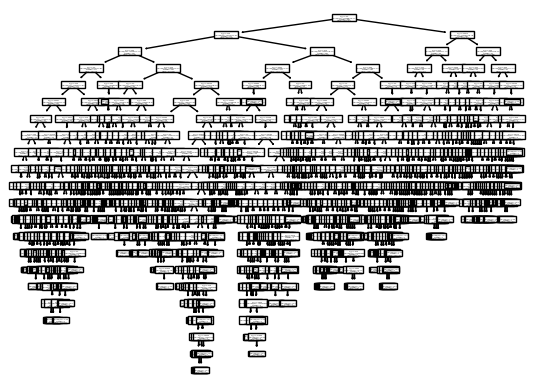

In [149]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [150]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.6968707668313829